# Train Emulators for a PFT and Investigate Emulator Error

In [57]:
import os
import pandas as pd
import numpy as np
import fates_calibration.train_emulators as tr
from fates_calibration.FATES_calibration_constants import FATES_PFT_IDS

## Setup

In [36]:
# mesh file and land mask files used in the simulation
mesh_file_dir = '/glade/work/afoster/FATES_calibration/mesh_files'
land_mask_file = os.path.join(mesh_file_dir, 'dominant_pft_grid.nc')
mesh_file = os.path.join(mesh_file_dir, 'dominant_pft_grid_mesh.nc')

# post-processed ensemble
ensemble_dir = '/glade/work/afoster/FATES_calibration/FATES_SP_LH'
ensemble_file = os.path.join(ensemble_dir, 'dompft_ensemble.nc')

# latin hypercube key
lhc_key = '/glade/u/home/afoster/FATES_Calibration/lh_key_dompft.csv'

# emulator directory
emulator_dir = '/glade/u/home/afoster/FATES_Calibration/pft_output/emulators'

In [37]:
# variables to emulate and test/train split
vars = ['GPP', 'EFLX_LH_TOT', 'FSH', 'EF']
n_test = 50

In [59]:
# observations
obs_file = '/glade/work/afoster/FATES_calibration/mesh_files/dominant_pft_grid.csv'
obs_df_all = pd.read_csv(obs_file)
pfts = np.unique(obs_df_all.pft)

In [75]:
# latin hypercube key
lhkey_df = pd.read_csv(lhc_key)
lhkey_df = lhkey_df.drop(columns=['ensemble'])
param_names = lhkey_df.columns

In [60]:
pfts

array(['arctic_c3_grass', 'broadleaf_evergreen_tropical_tree', 'c4_grass',
       'cool_c3_grass', 'needleleaf_colddecid_extratrop_tree',
       'needleleaf_evergreen_extratrop_tree'], dtype=object)

In [123]:
# which pft to run
pft = 'c4_grass'

In [124]:
pft_id = FATES_PFT_IDS[pft]

fig_dir = f'/glade/u/home/afoster/FATES_Calibration/pft_output/{pft_id}_outputs'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)

## Train Emulators

Training emulators for c4_grass grids...


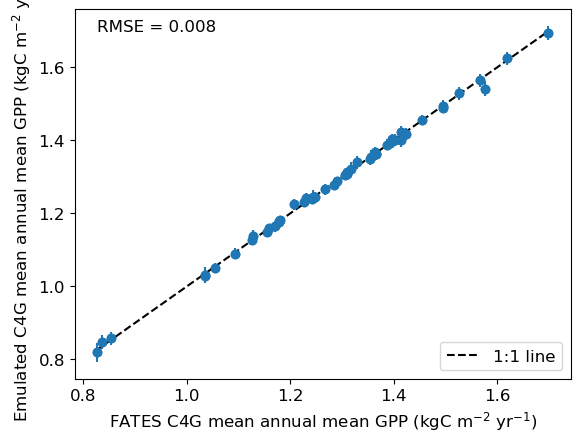

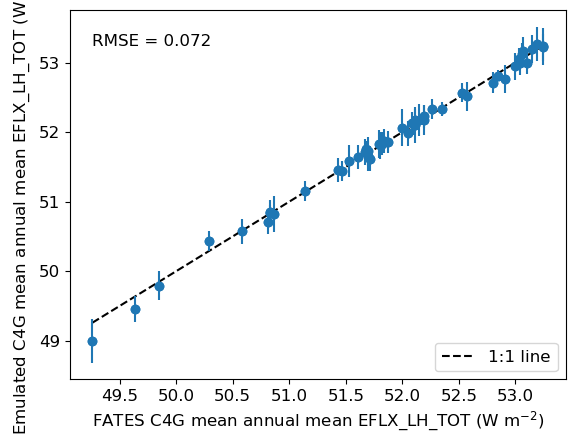

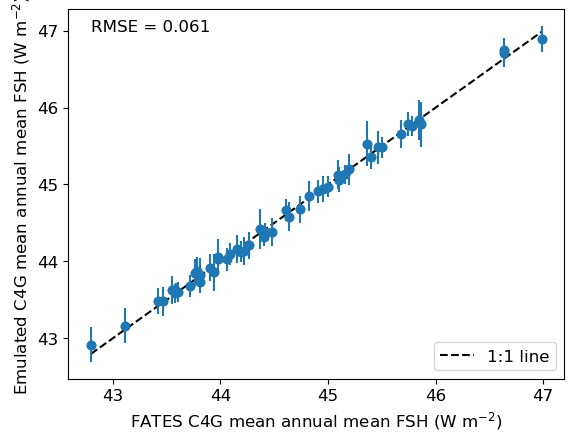

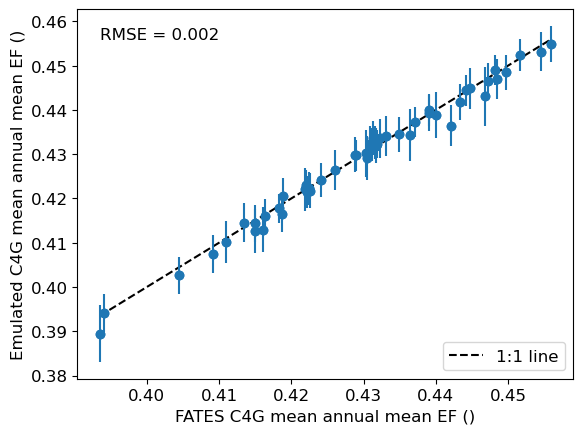

In [125]:
print(f"Training emulators for {pft} grids...")
fates_calibration.train_emulators.train(pft, land_mask_file, mesh_file, ensemble_file, vars, lhc_key, n_test, emulator_dir, fig_dir)

## Investigate Output

In [126]:
# first load back emulators
emulators = emf.load_all_emulators(pft_id, emulator_dir, vars)

In [127]:
# subset observations
obs_df = obs_df_all[obs_df_all.pft == pft]

### Emulator Sensitivity
See which parameters affect output the most for this pft

Running sensitivity analyses c4_grass grids...


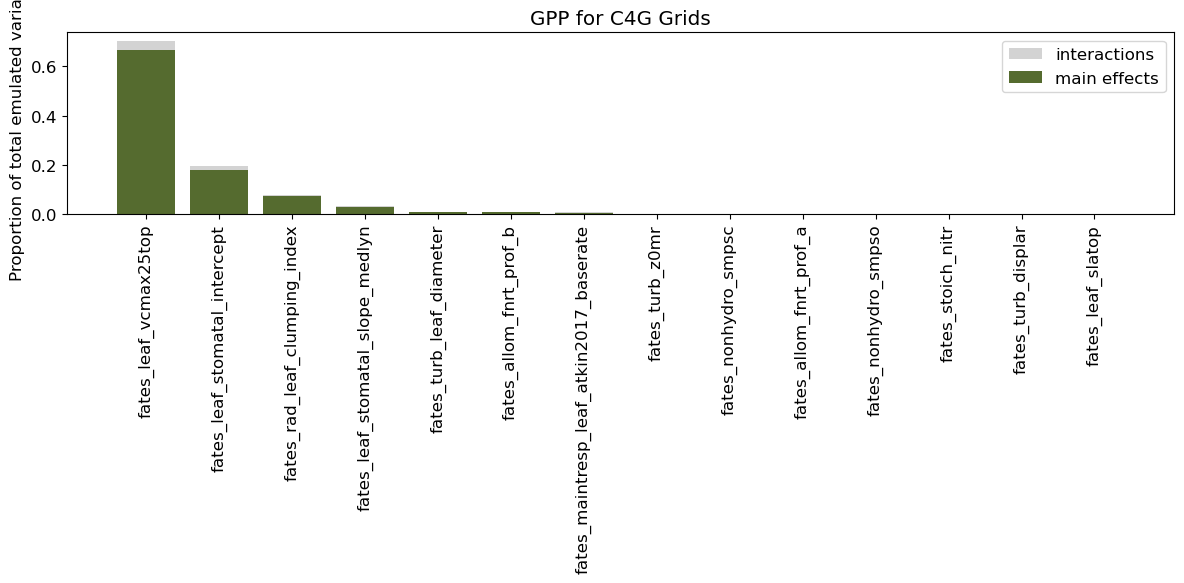

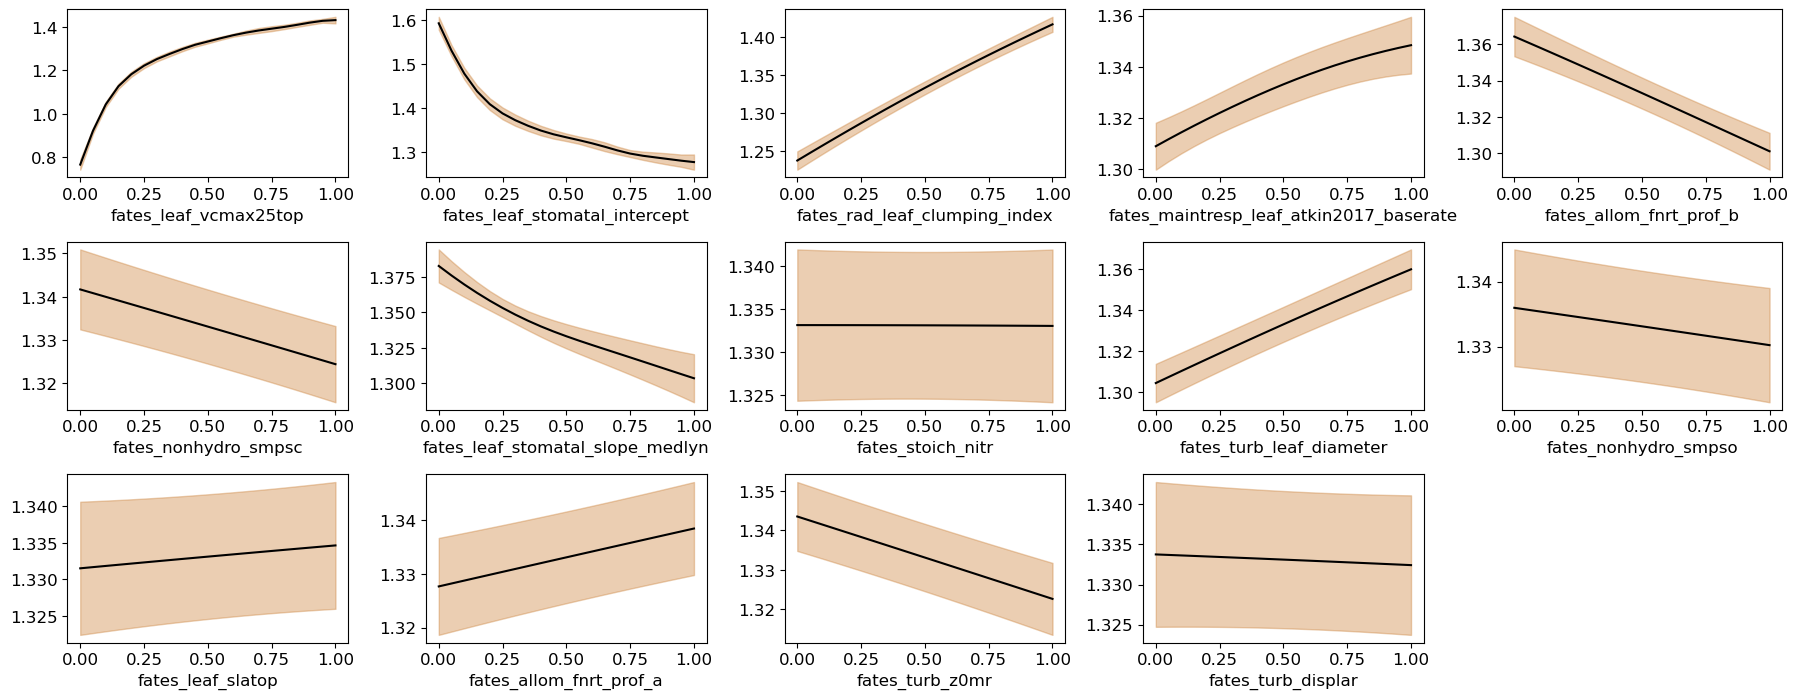

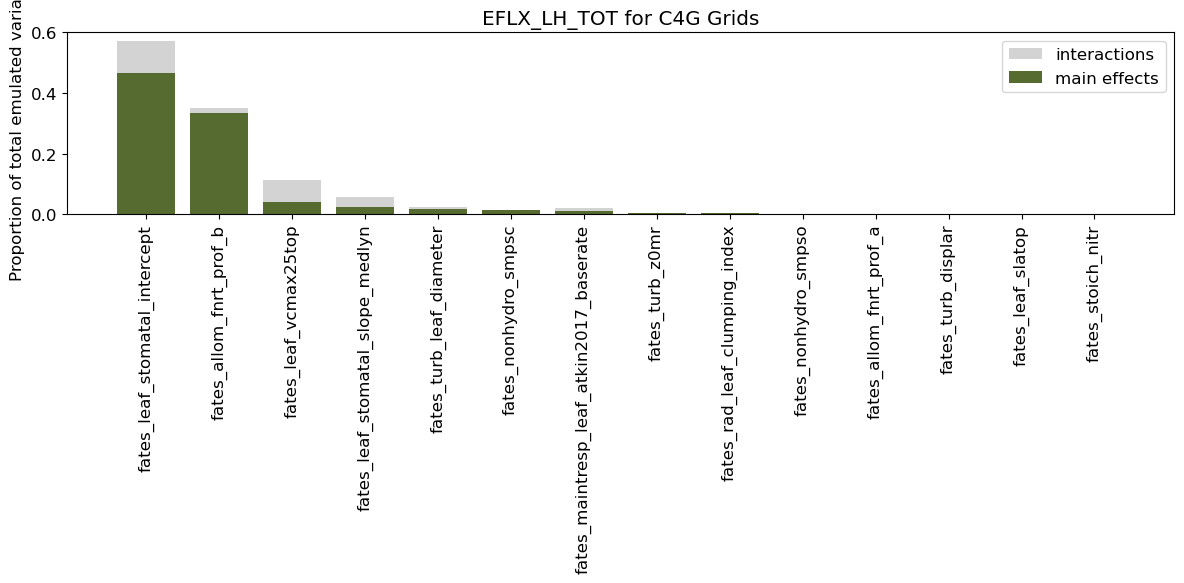

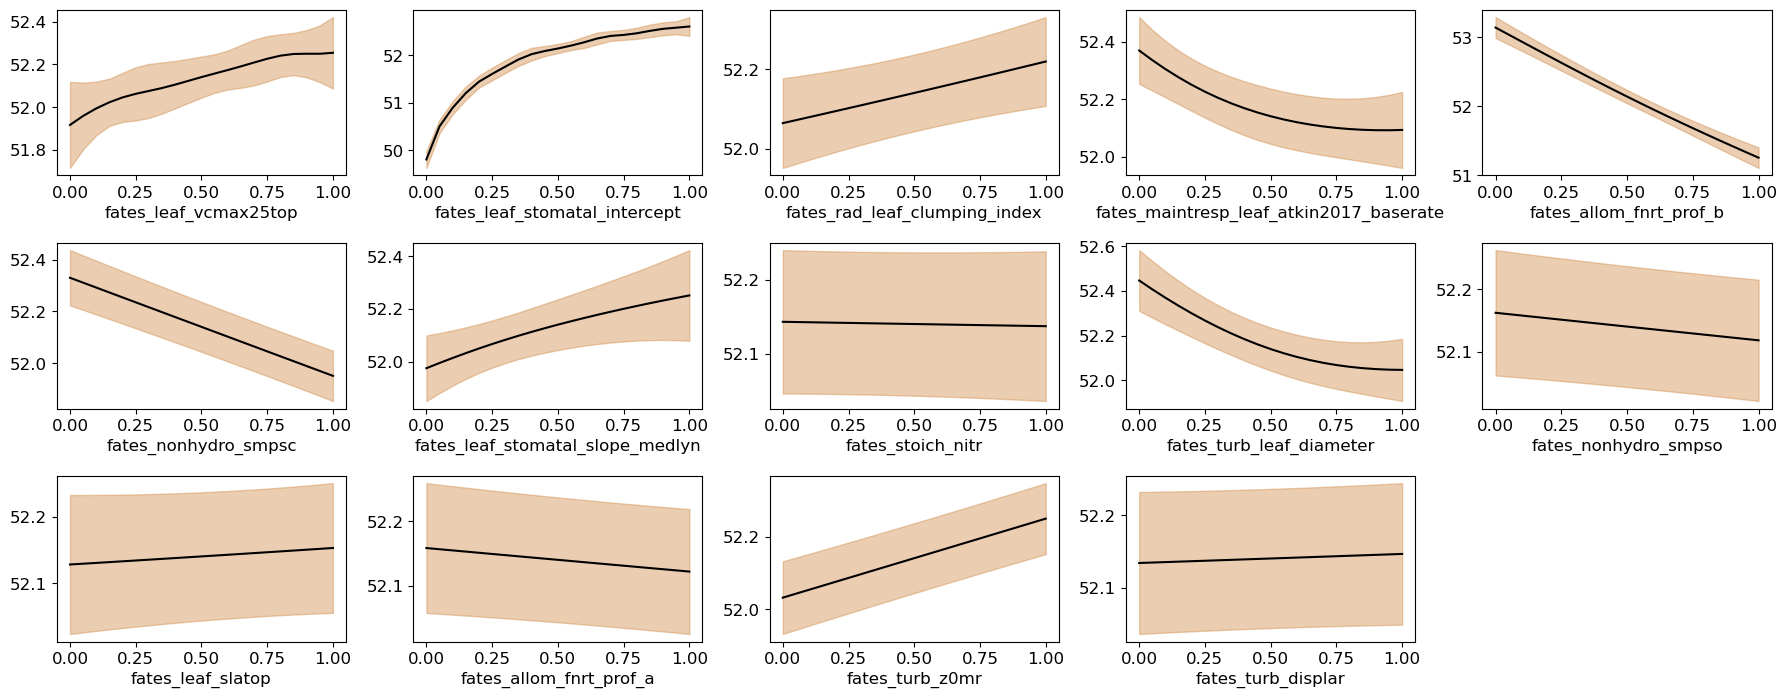

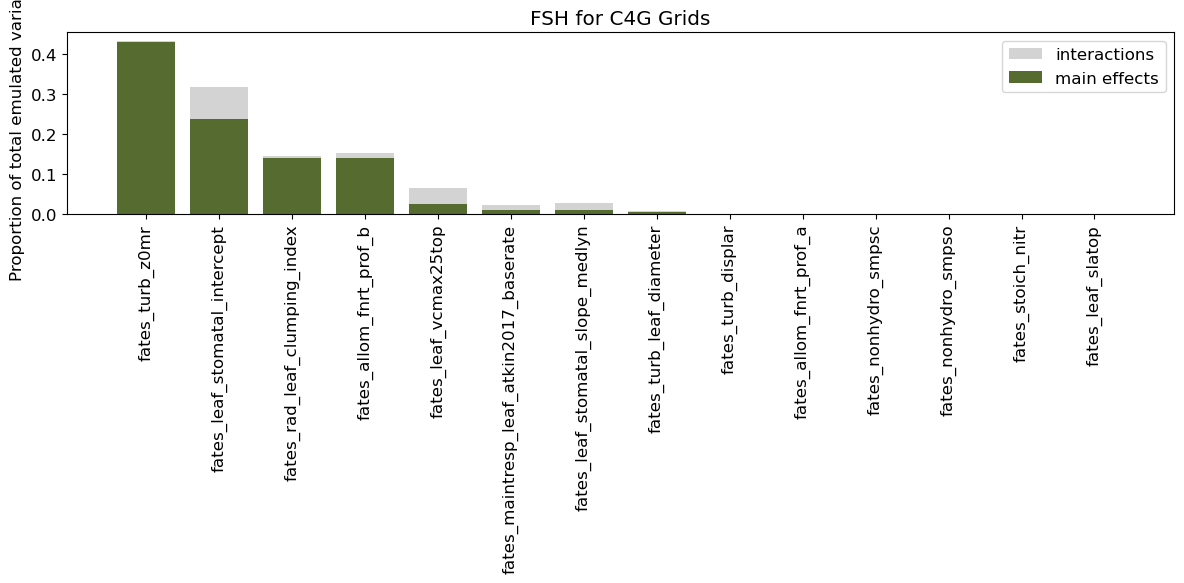

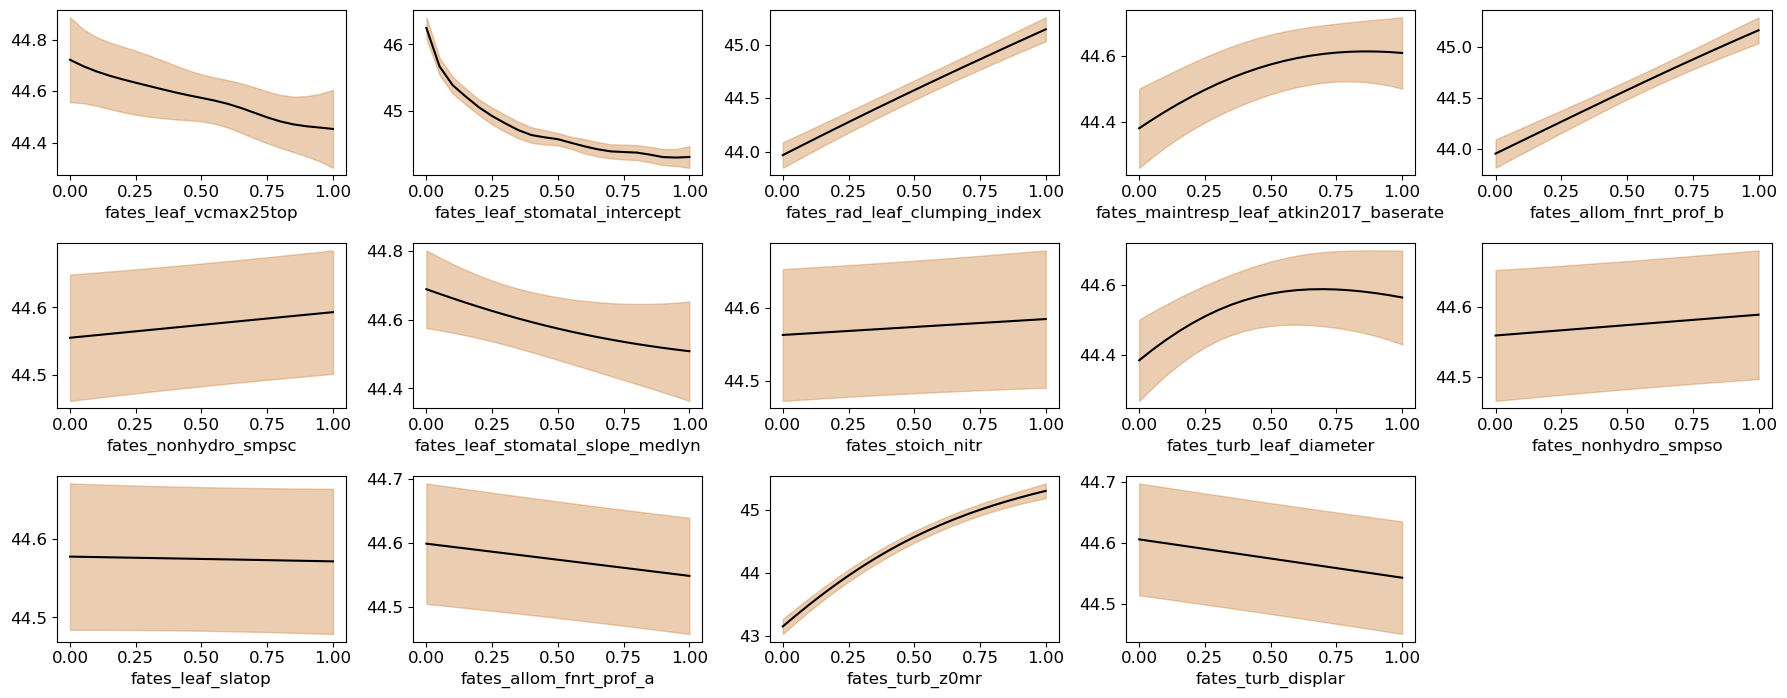

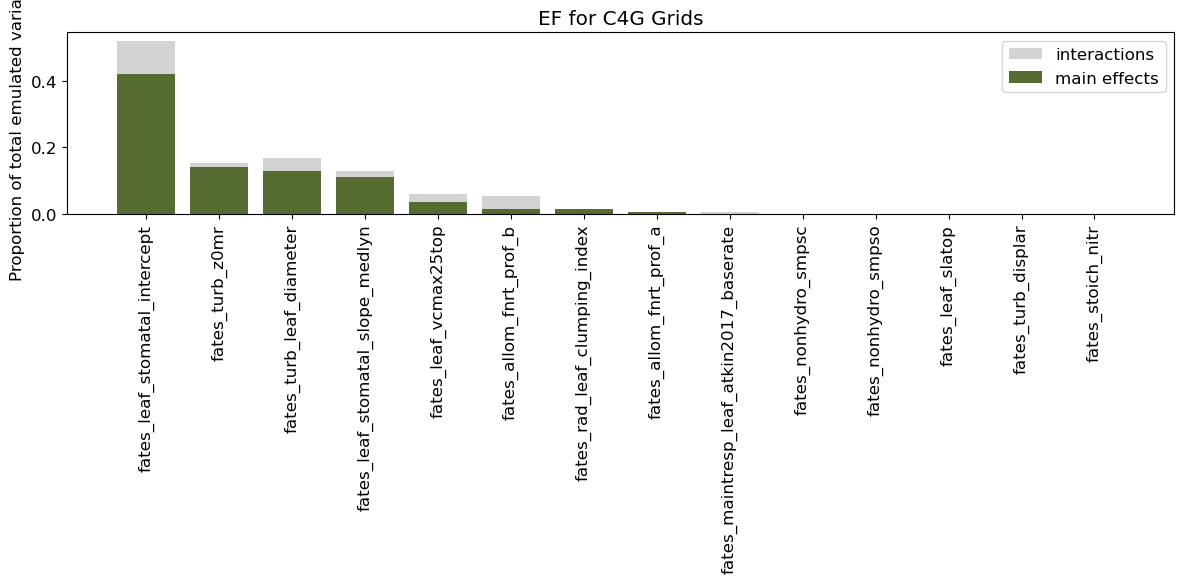

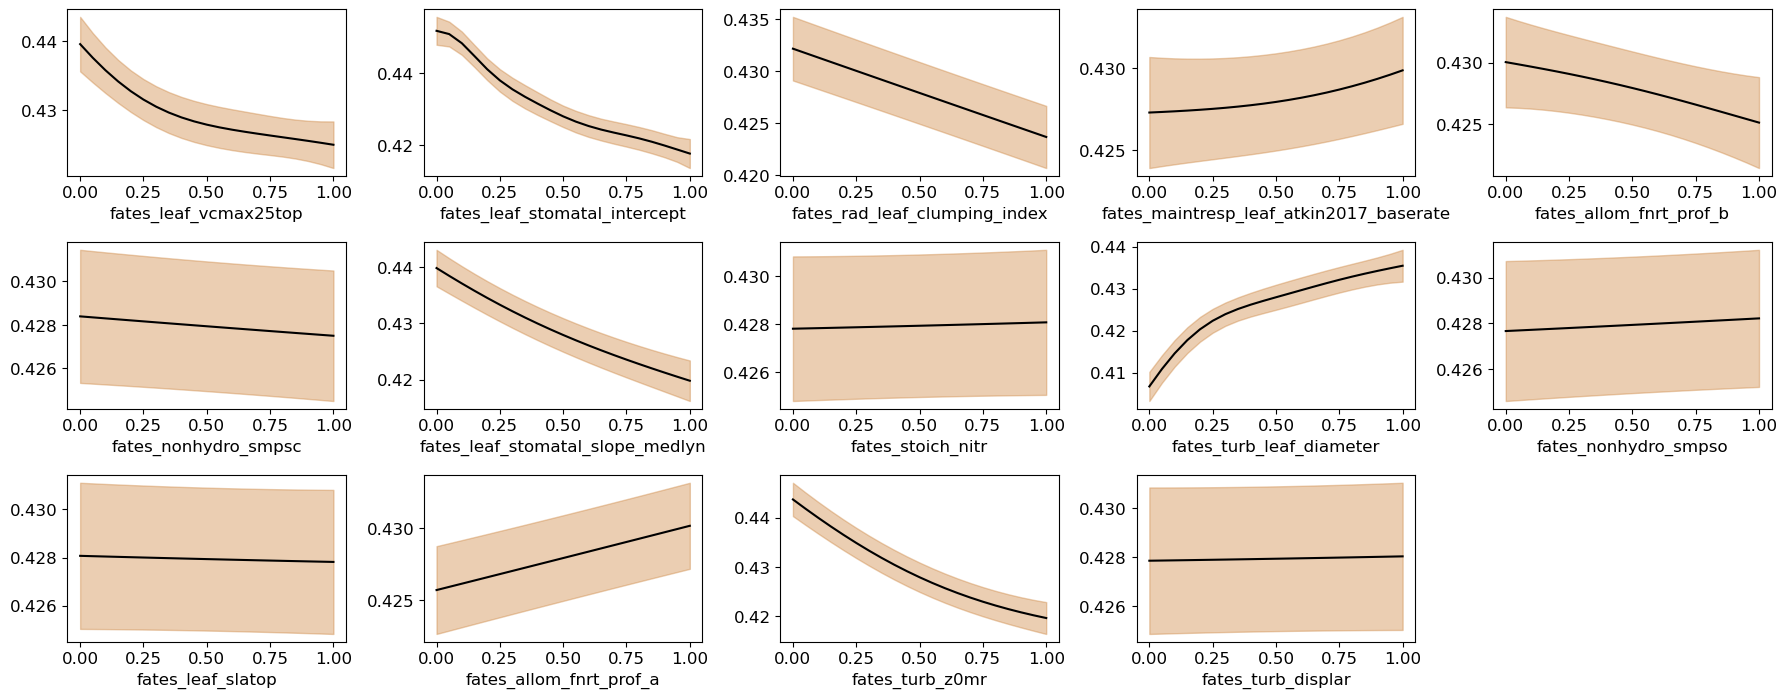

In [128]:
# sensitivity dataframe
print(f"Running sensitivity analyses {pft} grids...")
sens_df = emf.sensitivity_analysis(emulators, param_names, pft_id, fig_dir, plot_figs=True)

In [129]:
sens_df.to_csv(f"{fig_dir}/{pft_id}_emulator_sensitivity.csv")

### Emulator Sampling
See if any of our emulated sample covers the observational variance

Sampling c4_grass grids...


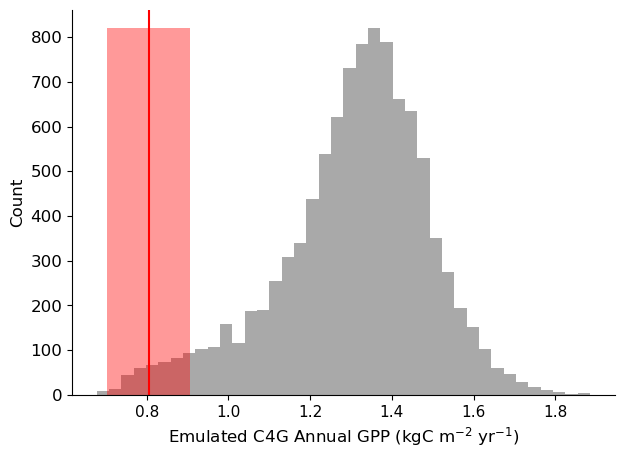

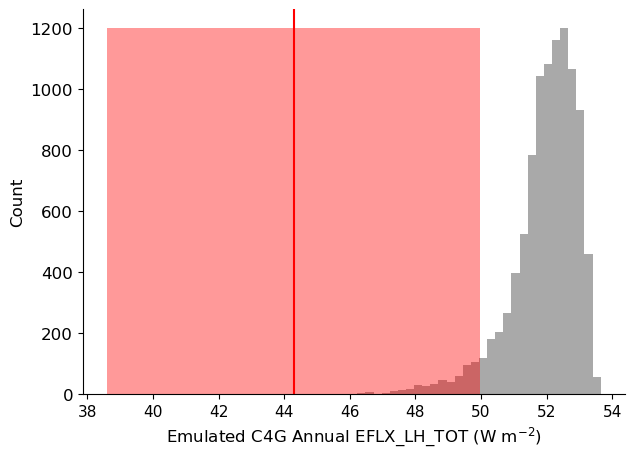

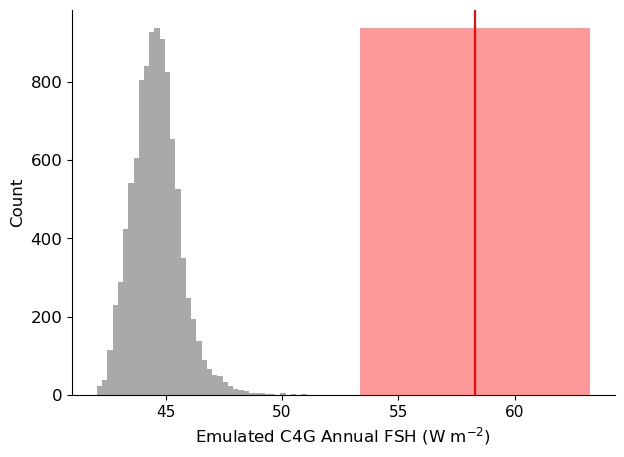

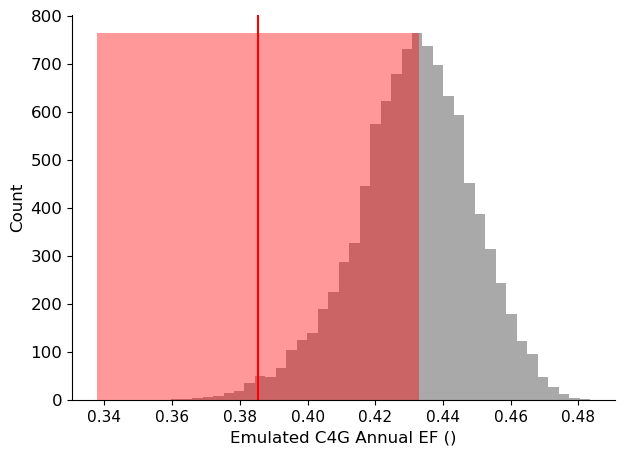

In [130]:
n_samp = 10000
print(f"Sampling {pft} grids...")
sample_df = emf.sample_emulators(emulators, param_names, n_samp, obs_df, fig_dir, pft_id, plot_figs=True)

In [131]:
sens_df.to_csv(f"{fig_dir}/{pft_id}_emulator_samples.csv")

In [133]:
sample_df_sub = emf.subset_sample(sample_df, [f"{var}_implausibility" for var in vars], 3)
print(f"{len(sample_df_sub)/len(sample_df)*100.0}% of emulated sample falls within observational tolerance.")

11.86% of emulated sample falls within observational tolerance.
